In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [9]:
data = {}
paramsNameList = []

batchNames = ['v0_batch0', 'v0_batch1'] # frac_Th_S1 - [0, 0.1 , 0.5, 1.0]
number = 0
for batchName in batchNames:  
    number = number + 1  

    with open(batchName + '/' + batchName + '_batch.json', 'r') as f:
            batchInfo = json.load(f) 

    params = batchInfo['batch']['params']       
    print('\n--------------------\n',batchName)
    for name in params:
        print(name['label'])
        print(name['values'])

    weightLong_thalM1 = params[0]['values']
    weightLong_M1thal = params[1]['values']

    for p1 in range(np.size(weightLong_thalM1)):
        for p2 in range(np.size(weightLong_M1thal)):
            paramsName  = 'wthM1_' + str(weightLong_thalM1[p1]) + '_wM1th_' + str(weightLong_M1thal[p2])
            paramsNameList.append(paramsName)
            with open(batchName + '/' + batchName + '_' + str(p1) + '_' + str(p2) + '_data.json', 'r') as f:
                data[paramsName] = json.load(f) 


--------------------
 v0_batch0
weightLong_thalM1
[0.0]
weightLong_M1thal
[0.0]

--------------------
 v0_batch1
weightLong_thalM1
[0.25]
weightLong_M1thal
[0.25, 0.5, 0.75]


In [10]:
list(data)

['wthM1_0.0_wM1th_0.0',
 'wthM1_0.25_wM1th_0.25',
 'wthM1_0.25_wM1th_0.5',
 'wthM1_0.25_wM1th_0.75']

In [22]:
data[paramsName]['simData']['popRates']

{'CT6': 0.6721682847896441,
 'IT2': 0.9065895953757226,
 'IT4': 1.2396349413298566,
 'IT5A': 11.024223602484472,
 'IT5B': 30.325574912891987,
 'IT6': 8.311650485436893,
 'M2': 2.3004000000000002,
 'NGF1': 6.4722580645161285,
 'NGF2': 22.763157894736842,
 'NGF4': 85.6,
 'NGF5A': 132.64000000000001,
 'NGF5B': 99.00625,
 'NGF6': 27.244999999999997,
 'OC': 2.364,
 'POm_sTC_m1': 1.2239416058394161,
 'POm_sTC_s1': 2.5541605839416057,
 'PT5B': 31.008222996515677,
 'PV2': 0.0,
 'PV4': 0.0,
 'PV5A': 0.0,
 'PV5B': 0.0,
 'PV6': 0.0,
 'S1': 2.2648,
 'S2': 2.2856,
 'SOM2': 0.0,
 'SOM4': 0.0,
 'SOM5A': 0.0,
 'SOM5B': 0.0,
 'SOM6': 0.0,
 'VIP2': 7.65607476635514,
 'VIP4': 9.0,
 'VIP5A': 78.21538461538462,
 'VIP5B': 27.386666666666667,
 'VIP6': 20.425,
 'VL_sTC': 0.4011527377521614,
 'VM_sTC_m1': 53.57682242990654,
 'VPL_sTC': 1.8670731707317074,
 'VPM_sTC': 1.7911799761620977,
 'cM1': 2.3600000000000003,
 'mt_RTN': 42.68183006535948,
 'ss_RTN_i': 13.105882352941176,
 'ss_RTN_m': 10.387434554973822,
 

In [13]:
M1_pops =  ["NGF1","IT2","SOM2","PV2","VIP2","NGF2","IT4","SOM4","PV4","VIP4","NGF4","IT5A",
            "SOM5A","PV5A","VIP5A","NGF5A","IT5B","PT5B","SOM5B","PV5B","VIP5B","NGF5B","IT6",
            "CT6","SOM6","PV6","VIP6","NGF6"]
S1_pops = []

Th_pops = ["VPL_sTC","VPM_sTC","POm_sTC_s1","VL_sTC","VM_sTC_m1","POm_sTC_m1","mt_RTN",
           "ss_RTN_o","ss_RTN_m","ss_RTN_i"]

In [39]:
# EpopsS1 = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
#              'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
#              'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

# EpopsTh = ['VPL_sTC', 'VPM_sTC', 'POm_sTC_s1', ...]

EpopsM1 = ["IT2","IT4","IT5A","IT5B","PT5B","IT6","CT6"]

IpopsM1 = []

for popName in M1_pops:
    if popName not in EpopsM1:
        IpopsM1.append(popName)

In [21]:
cellID_i = []
for cellID in list(data[paramsName]['simData']['V_soma']):
#     print(cellID.split('_')[1])
    cellID_i.append(int(cellID.split('_')[1]))

cellID_i = sorted(cellID_i)

cellID_i

In [33]:
popNumber = {}
for i,pop in enumerate(M1_pops+Th_pops):
#     print(i,cellID_i[i],pop)
    if pop == Th_pops[-1]:
        popNumber[pop] = 765
    else:
        popNumber[pop] = cellID_i[i+1]-cellID_i[i]
popNumber

{'NGF1': 465,
 'IT2': 1730,
 'SOM2': 35,
 'PV2': 89,
 'VIP2': 107,
 'NGF2': 76,
 'IT4': 767,
 'SOM4': 12,
 'PV4': 48,
 'VIP4': 6,
 'NGF4': 7,
 'IT5A': 644,
 'SOM5A': 54,
 'PV5A': 92,
 'VIP5A': 13,
 'NGF5A': 10,
 'IT5B': 1435,
 'PT5B': 1435,
 'SOM5B': 296,
 'PV5B': 354,
 'VIP5B': 45,
 'NGF5B': 64,
 'IT6': 1236,
 'CT6': 1236,
 'SOM6': 87,
 'PV6': 116,
 'VIP6': 112,
 'NGF6': 80,
 'VPL_sTC': 656,
 'VPM_sTC': 839,
 'POm_sTC_s1': 685,
 'VL_sTC': 1041,
 'VM_sTC_m1': 535,
 'POm_sTC_m1': 685,
 'mt_RTN': 1530,
 'ss_RTN_o': 382,
 'ss_RTN_m': 382,
 'ss_RTN_i': 765}

In [34]:
paramsNameList

['wthM1_0.0_wM1th_0.0',
 'wthM1_0.25_wM1th_0.25',
 'wthM1_0.25_wM1th_0.5',
 'wthM1_0.25_wM1th_0.75']

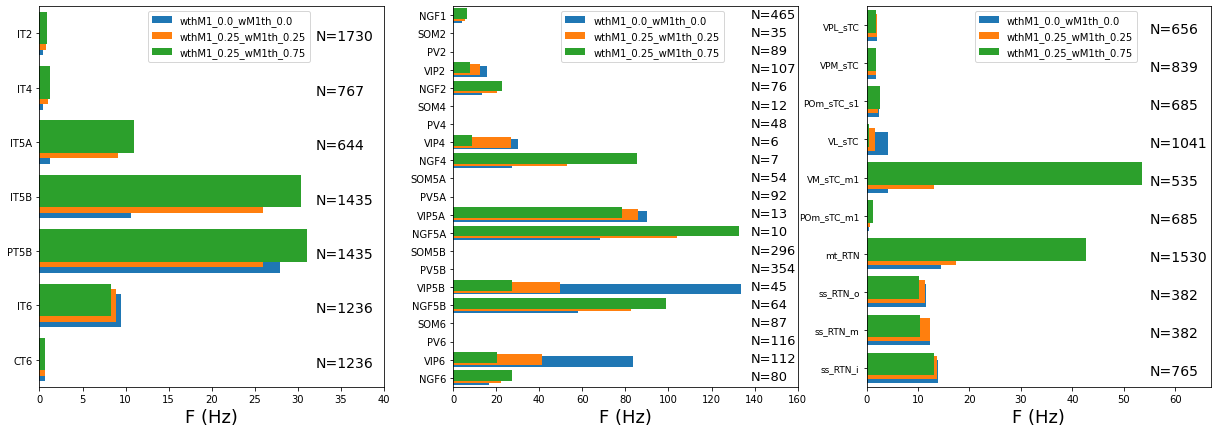

In [74]:
paramsNameListtocompare = [paramsNameList[2], paramsNameList[1], paramsNameList[0]]
def compare3FR(paramsNameListtocompare):
    plt.figure(figsize=(21,7))
    widths = 0.6
    plt.subplot(1, 3, 1) 
    number = 0
    for paramsName in paramsNameListtocompare:
        popRates = []
        popNames = []
        number2 = 0
        for popName in EpopsM1:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(32, number2 + 0.13, 'N=' + str(popNumber[popName]), fontsize=14)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName) 
        number = number + 1

    plt.ylim(6.5,-0.5)
    plt.xlim(0,40)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 2)  
    number = 0
    for paramsName in paramsNameListtocompare:   
        popRates = []
        popNames = []
        number2 = 0
        for popName in IpopsM1:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(138, number2 + 0.15, 'N=' + str(popNumber[popName]), fontsize=13)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName) 
        number = number + 1

    plt.ylim(20.5,-0.5)
    plt.xlim(0,160)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 3)   
    number = 0
    for paramsName in paramsNameListtocompare:    
        popRates = []
        popNames = []
        number2 = 0
        for popName in Th_pops:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(55, number2 + 0.2, 'N=' + str(popNumber[popName]), fontsize=14)  
                number2 = number2 + 1          
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName) 
        number = number + 1

    plt.ylim(9.5,-0.5)
    plt.xlim(0,67)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=9)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    
    namefig = 'FR_' + batchName + '_' 
    for paramsName in paramsNameListtocompare:    
         namefig = namefig + paramsName[5:] + '_' 
    namefig = namefig + '.png'
    plt.savefig(namefig, facecolor = 'white', bbox_inches='tight' , dpi=300)
    
paramsNameListtocompare = [paramsNameList[0], paramsNameList[1], paramsNameList[3]]
compare3FR(paramsNameListtocompare)

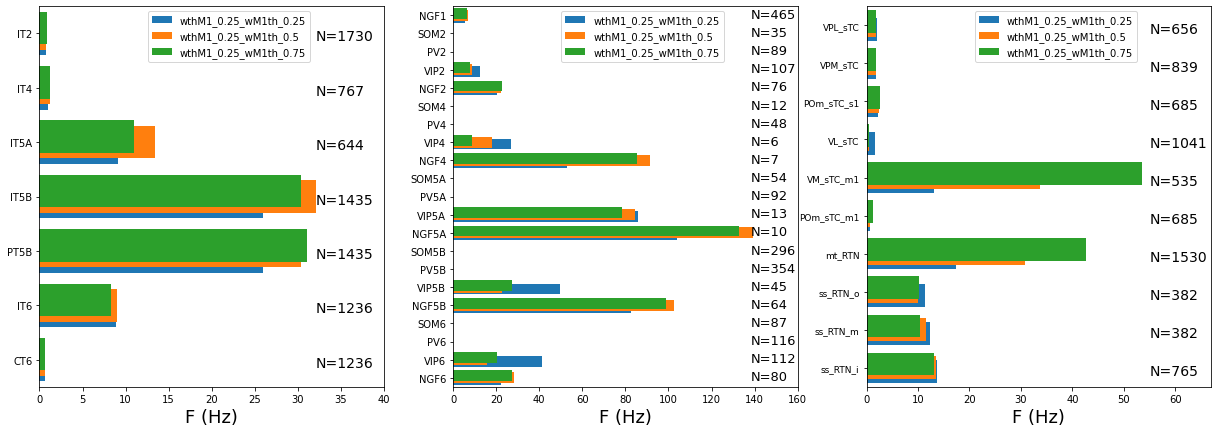

In [75]:
paramsNameListtocompare = [paramsNameList[1], paramsNameList[2], paramsNameList[3]]
compare3FR(paramsNameListtocompare)

In [37]:
paramsNameList

['frac_Th_S1_0.0', 'frac_Th_S1_0.1', 'frac_Th_S1_0.5', 'frac_Th_S1_1.0']

In [56]:
popID = {}
sum = 0
for mtype in popNumber.keys():
    popID[mtype] = sum
    sum += popNumber[mtype]
    
popID

{'NGF1': 0,
 'IT2': 465,
 'SOM2': 2195,
 'PV2': 2230,
 'VIP2': 2319,
 'NGF2': 2426,
 'IT4': 2502,
 'SOM4': 3269,
 'PV4': 3281,
 'VIP4': 3329,
 'NGF4': 3335,
 'IT5A': 3342,
 'SOM5A': 3986,
 'PV5A': 4040,
 'VIP5A': 4132,
 'NGF5A': 4145,
 'IT5B': 4155,
 'PT5B': 5590,
 'SOM5B': 7025,
 'PV5B': 7321,
 'VIP5B': 7675,
 'NGF5B': 7720,
 'IT6': 7784,
 'CT6': 9020,
 'SOM6': 10256,
 'PV6': 10343,
 'VIP6': 10459,
 'NGF6': 10571,
 'VPL_sTC': 10651,
 'VPM_sTC': 11307,
 'POm_sTC_s1': 12146,
 'VL_sTC': 12831,
 'VM_sTC_m1': 13872,
 'POm_sTC_m1': 14407,
 'mt_RTN': 15092,
 'ss_RTN_o': 16622,
 'ss_RTN_m': 17004,
 'ss_RTN_i': 17386}

In [79]:
paramsName = 'wthM1_0.0_wM1th_0.0'

popID = {}
N = 0
for mtype in popNumber.keys():
    popID[mtype] = N
    N += popNumber[mtype]
    

spkid = list(data[paramsName]['simData']['spkid'])
spkt = list(data[paramsName]['simData']['spkt'])
print('N =',N,', Number of spikes =',np.size(spkt),', FR =',np.size(spkt)/(2.5*N))

print('\nafter 1500.0ms transient\n')
#after transient
for mtype in M1_pops+Th_pops:
    popName = mtype
    FRafter = []
    for i in range(np.size(spkt)):
        if spkid[i] >= popID[mtype] and spkid[i] < popID[mtype]+popNumber[mtype] and spkt[i] > 1500.0:
    #         print('%.3f %.0f' % (spkt[i],spkid[i]))
            FRafter.append(spkt[i])
    print('%s \t\t\t(%d \t\tcells)\t\t %.3f\t\t %.3f\t\t'% (mtype,popNumber[mtype],np.size(FRafter)/(1.0*(popNumber[mtype])),data[paramsName]['simData']['popRates'][popName]))

N = 18151 , Number of spikes = 403799 , FR = 8.898661230786182

after 500.0ms transient

NGF1 			(465 		cells)		 2.194		 3.974		
IT2 			(1730 		cells)		 0.000		 0.410		
SOM2 			(35 		cells)		 0.000		 0.000		
PV2 			(89 		cells)		 0.000		 0.000		
VIP2 			(107 		cells)		 22.159		 15.794		
NGF2 			(76 		cells)		 3.882		 13.305		
IT4 			(767 		cells)		 0.000		 0.400		
SOM4 			(12 		cells)		 0.000		 0.000		
PV4 			(48 		cells)		 0.000		 0.000		
VIP4 			(6 		cells)		 54.000		 30.133		
NGF4 			(7 		cells)		 17.286		 27.486		
IT5A 			(644 		cells)		 0.034		 1.185		
SOM5A 			(54 		cells)		 0.000		 0.000		
PV5A 			(92 		cells)		 0.000		 0.000		
VIP5A 			(13 		cells)		 86.538		 89.908		
NGF5A 			(10 		cells)		 36.000		 68.280		
IT5B 			(1435 		cells)		 9.620		 10.652		
PT5B 			(1435 		cells)		 13.786		 27.947		
SOM5B 			(296 		cells)		 0.000		 0.000		
PV5B 			(354 		cells)		 0.000		 0.000		
VIP5B 			(45 		cells)		 137.756		 133.627		
NGF5B 			(64 		cells)		 28.672		 58.031		
IT6 			(1236 		cells)

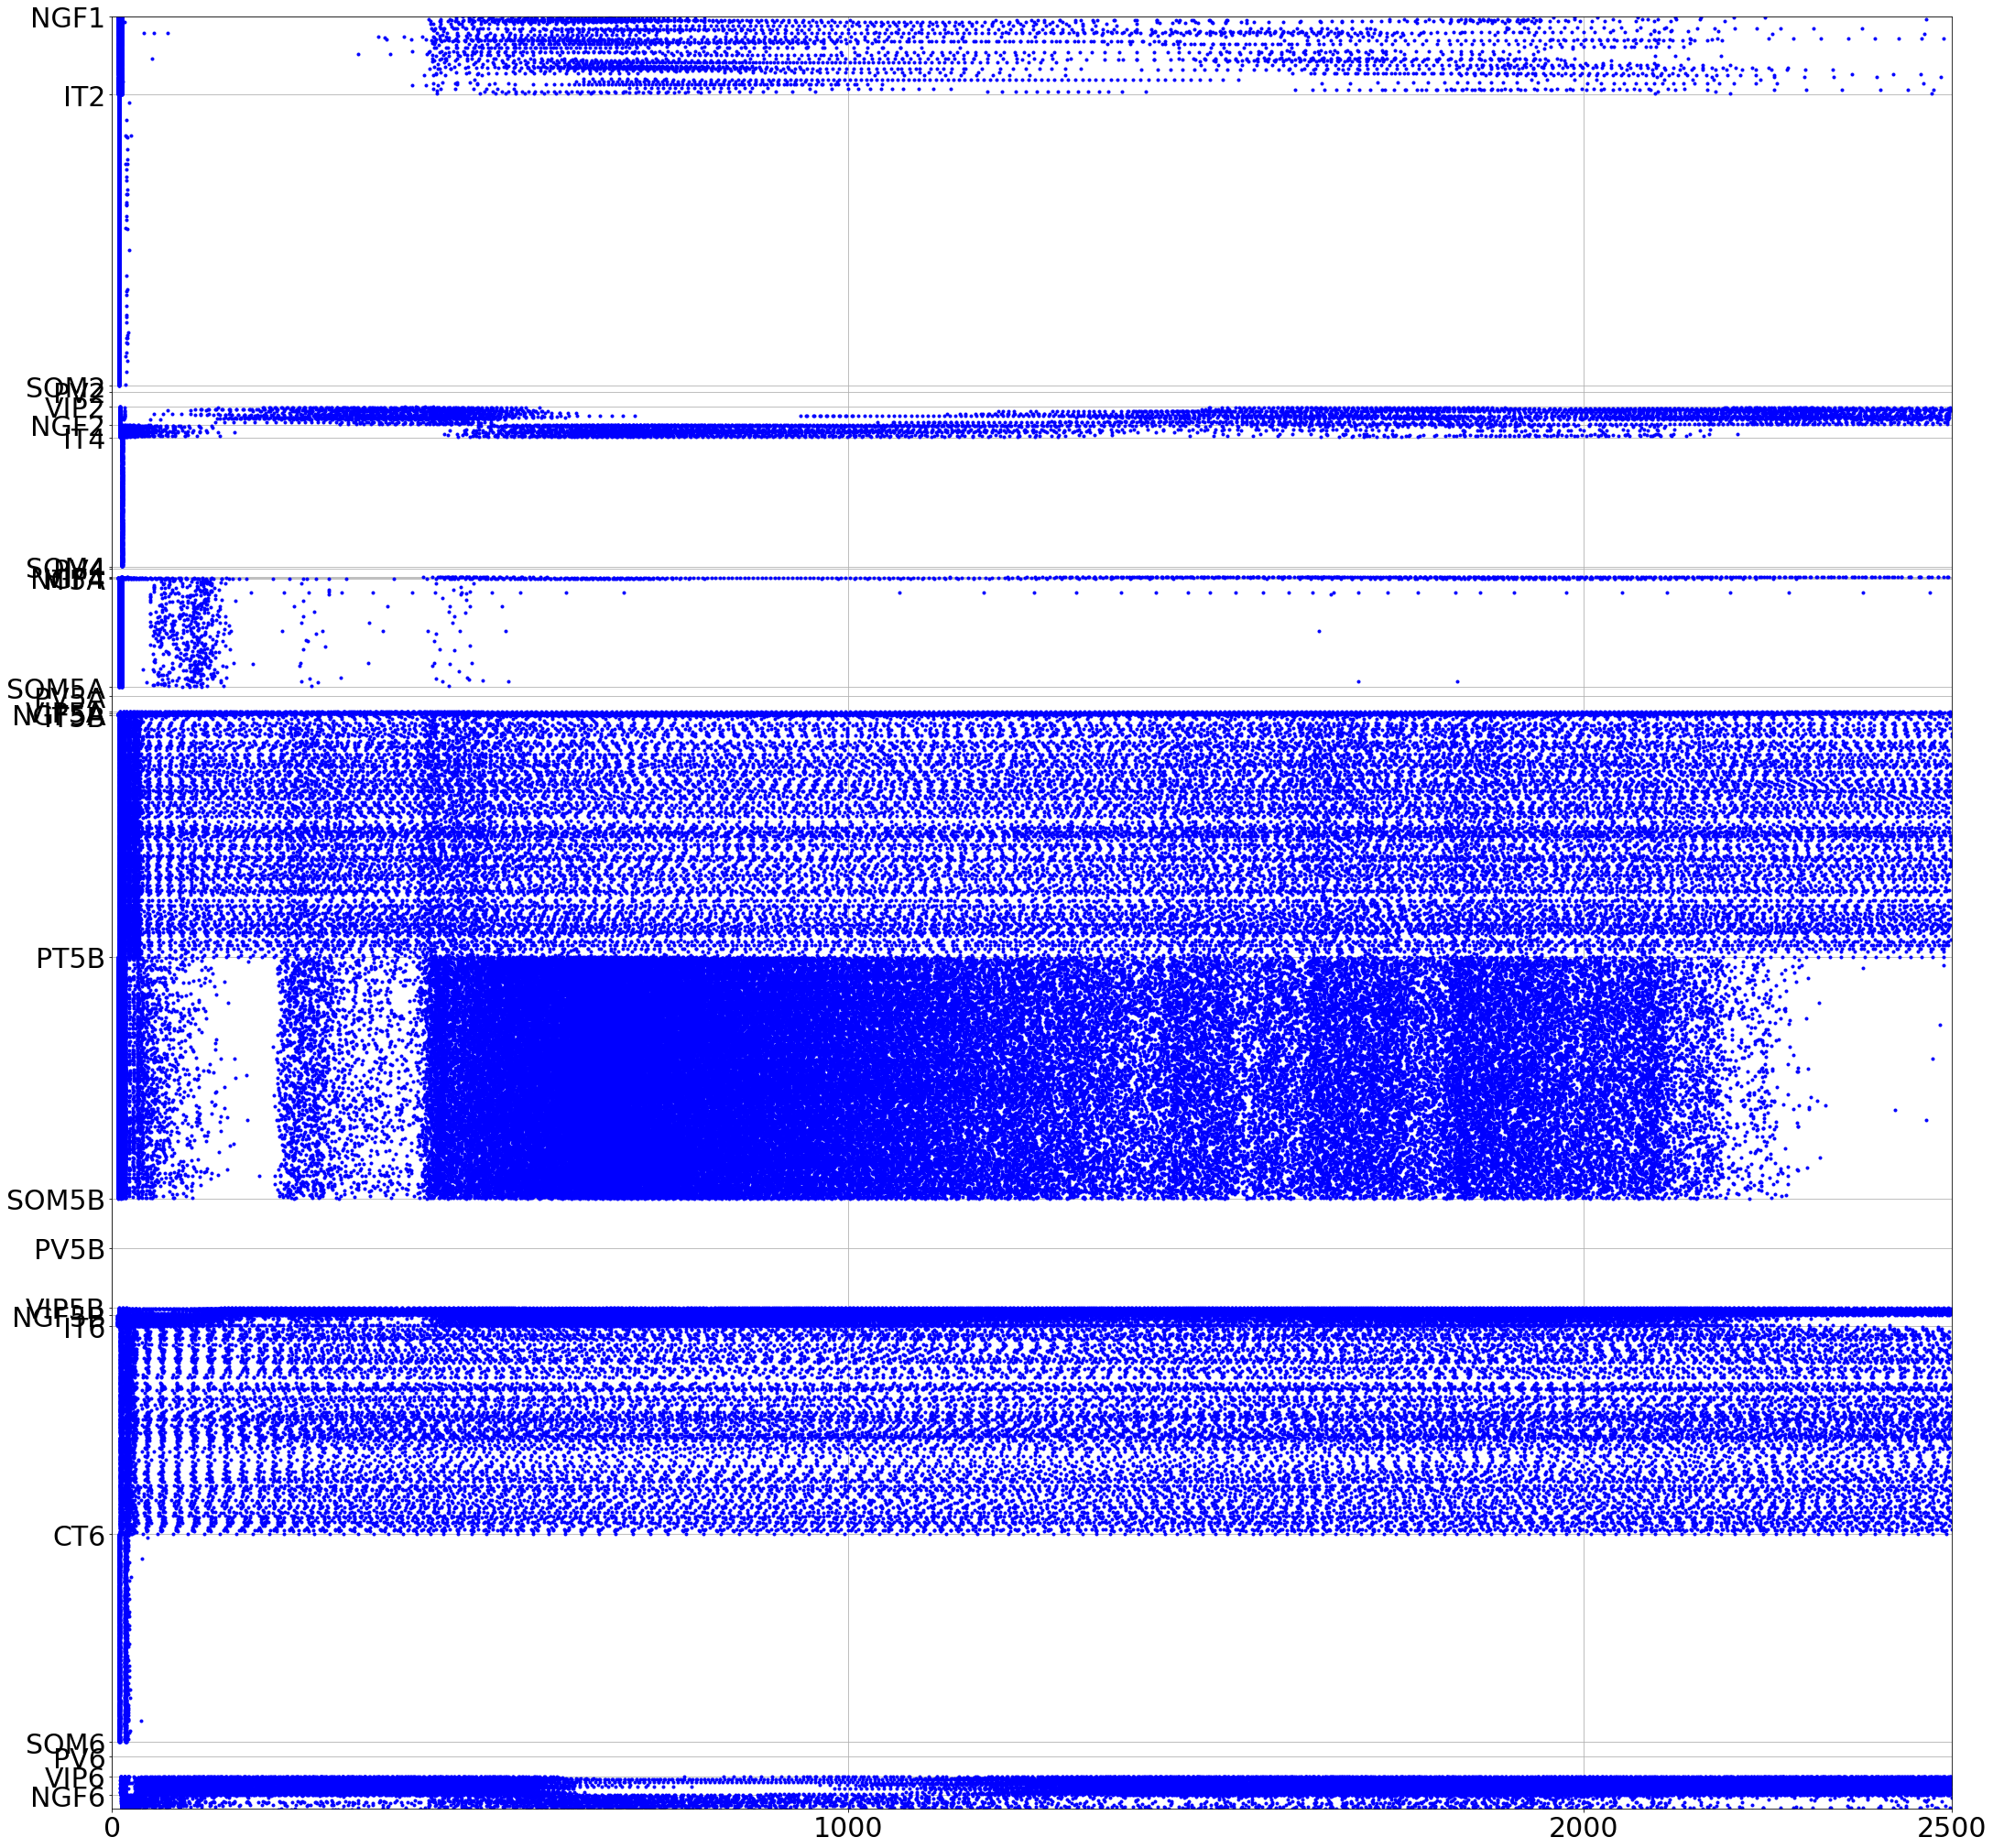

In [87]:
plt.figure(figsize=(36,36)) 
plt.xlim(0, 2500)
plt.ylim(17386+765,0)
plt.ylim(10651-1,0)
plt.xticks([0,1000,2000,2500], fontsize=30)
plt.yticks(cellID_i[:28],M1_pops,fontsize=30)
plt.plot(spkt, spkid,'b.')
plt.grid(True)
plt.savefig('M1_gID.png', bbox_inches='tight' , dpi=300)

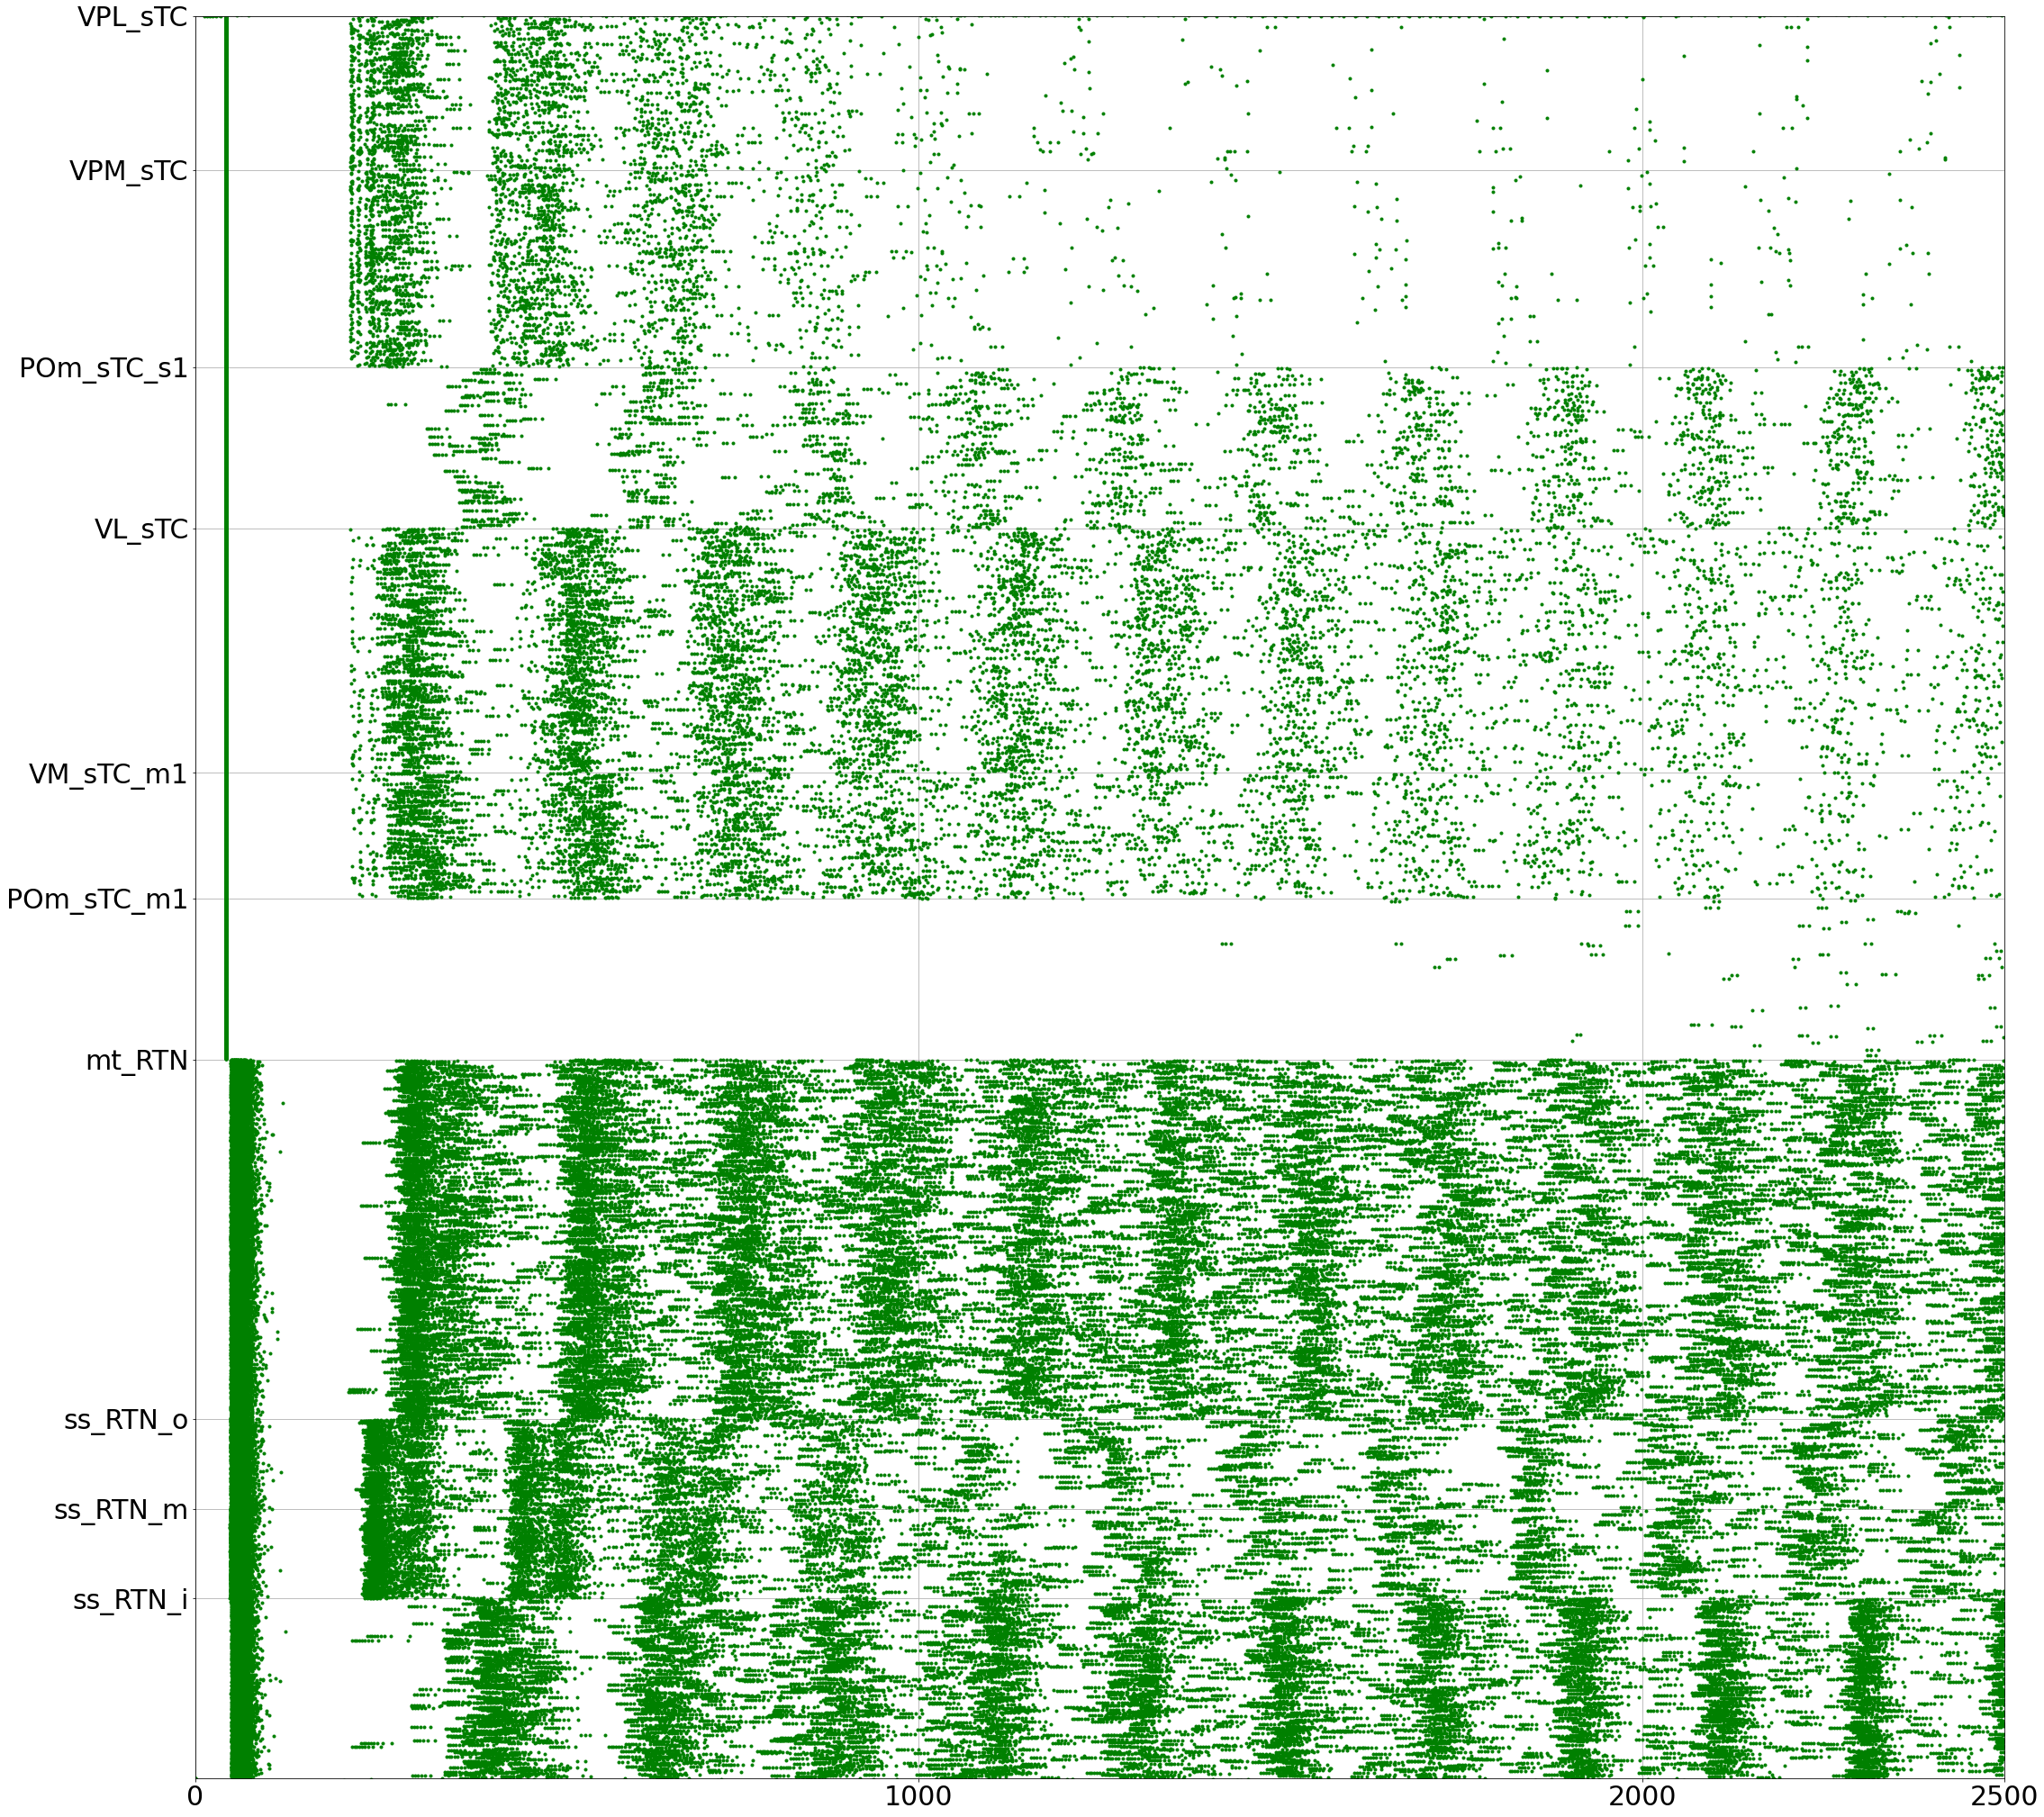

In [88]:
plt.figure(figsize=(36,36)) 
plt.xlim(0, 2500)
plt.ylim(17386+765,10651)
plt.xticks([0,1000,2000,2500], fontsize=30)
plt.yticks(cellID_i[28:],Th_pops,fontsize=30)
plt.plot(spkt, spkid,'g.')
plt.grid(True)
plt.savefig('Th_gID.png', bbox_inches='tight' , dpi=300)